# Comparing CMIP6 and CHIRPS precipitation dataset for Leeds Met Office Hackathon - Ministry for Food and Agriculture, Guana Group

#### Using Iris for NetCDF data load and processing

##### Timothy Lam t.lam@exeter.ac.uk

#### Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os

import iris

import iris.quickplot as qplt
import iris.coord_categorisation as coord_cat

import pandas as pd

import xarray as xr 

import statsmodels.api as sm

#### Set data paths

In [3]:
DATA_PATH = '/gws/pw/j05/cop26_hackathons/leeds/ministry/Tom_W/CMIP6_1980-2010_L1/'

DATA_PATH_2 = '/gws/pw/j05/cop26_hackathons/leeds/ministry/Tim/data/'

#### Load monthly precipitation data into an Iris cube

In [288]:
# define constraint
hist_constraint = iris.Constraint(time=lambda cell: 1981 <= cell.point.year <= 2010)
constraint_lon = iris.Constraint(longitude=lambda v: v >= -3.5 and v <= 1.2 )
constraint_lat = iris.Constraint(latitude=lambda v: v >= 4.5 and v <= 8 )
constraint = hist_constraint & constraint_lon & constraint_lat 


In [297]:
# Load CMIP6 models

#models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5',
#          'CESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'FGOALS-f3-L', 'FGOALS-g3', 'HadGEM3-GC31-MM',
#          'GISS-E2-1-G', 'INM-CM5-0', 'INM-CM4-8', 'MPI-ESM-1-2-HAM',
#          'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorCPM1', 'NorESM2-LM',
#          'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL']  # no data in MIROC6, IPSL-CM6A-LR, NESM3, SAM0-UNICON directories
models = ['TaiESM1']

print(len(models))

for model in models[0:]:   # remove the '2' for all models
    print(model)
    path = DATA_PATH + model + '/'
    cube = iris.load_cube(path + '*.pr.WA*.nc', constraint=constraint)
    cube.coord('longitude').guess_bounds()
    cube.coord('latitude').guess_bounds()
    iris.coord_categorisation.add_season(cube, 'time', name='clim_season')
    iris.coord_categorisation.add_season_year(cube, 'time', name='season_year')
    season_cube = cube.aggregated_by(
        ['clim_season', 'season_year'], 
        iris.analysis.MEAN)
    grid_area_weights = iris.analysis.cartography.area_weights(season_cube)
    N_Guana_mean = season_cube.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)
    jja_constraint = iris.Constraint(clim_season='jja')
    N_Guana_mean_jja = N_Guana_mean.extract(jja_constraint)
    
iris.save(N_Guana_mean_jja, 'TaiESM1-1.nc')

1
TaiESM1


/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'pr'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [4]:
# Load CHIRPS data
N_Guana_CHIRPS = iris.load (DATA_PATH_2 + 'CHIRPS_N_Guana.nc')

In [5]:
S_Guana_CHIRPS = iris.load (DATA_PATH_2 + 'CHIRPS_S_Guana.nc')

In [6]:
# Load CMIP6 data for North Guana
N_Guana_jja = iris.load(DATA_PATH_2 + 'N_Guana_*.nc')

print (N_Guana_jja)

0: precipitation_flux / (kg m-2 s-1)   (time: 30)
1: precipitation_flux / (kg m-2 s-1)   (time: 30)
2: precipitation_flux / (kg m-2 s-1)   (time: 30)
3: precipitation_flux / (kg m-2 s-1)   (time: 30)
4: precipitation_flux / (kg m-2 s-1)   (time: 30)
5: precipitation_flux / (kg m-2 s-1)   (time: 30)
6: precipitation_flux / (kg m-2 s-1)   (time: 30)
7: precipitation_flux / (kg m-2 s-1)   (time: 30)
8: precipitation_flux / (kg m-2 s-1)   (time: 30)
9: precipitation_flux / (kg m-2 s-1)   (time: 30)
10: precipitation_flux / (kg m-2 s-1)   (time: 30)
11: precipitation_flux / (kg m-2 s-1)   (time: 30)
12: precipitation_flux / (kg m-2 s-1)   (time: 30)
13: precipitation_flux / (kg m-2 s-1)   (time: 30)
14: precipitation_flux / (kg m-2 s-1)   (time: 30)
15: precipitation_flux / (kg m-2 s-1)   (time: 30)
16: precipitation_flux / (kg m-2 s-1)   (time: 30)
17: precipitation_flux / (kg m-2 s-1)   (time: 30)
18: precipitation_flux / (kg m-2 s-1)   (time: 30)
19: precipitation_flux / (kg m-2 s-1)   (

Text(0, 0.5, 'Rainfall (mm/day)')

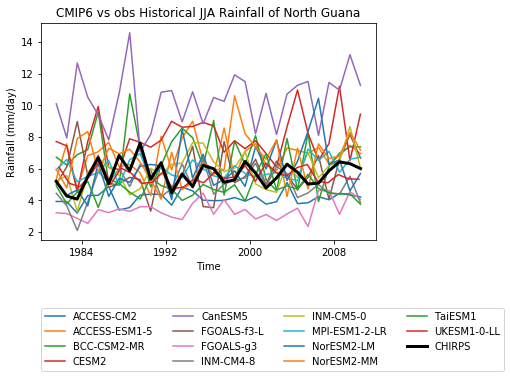

In [93]:
# Plot CMIP6 data

qplt.plot (N_Guana_jja[0]*86400) # ACCESS-CM2
qplt.plot (N_Guana_jja[1]*86400) # ACCESS-ESM1-5
qplt.plot (N_Guana_jja[2]*86400) # BCC-CSM2-MR
qplt.plot (N_Guana_jja[3]*86400) # CESM2
# qplt.plot (N_Guana_jja[4]*86400) # CNRM-CM6-1 # Problematic
# qplt.plot (N_Guana_jja[5]*86400) # CNRM-ESM2-1 # Problematic
qplt.plot (N_Guana_jja[6]*86400) # CanESM5
qplt.plot (N_Guana_jja[7]*86400) # FGOALS-f3-L
qplt.plot (N_Guana_jja[8]*86400) # FGOALS-g3
# qplt.plot (N_Guana_jja[9]*86400) # HadGEM3-GC31-MM
qplt.plot (N_Guana_jja[10]*86400) # INM-CM4-8
qplt.plot (N_Guana_jja[11]*86400) # INM-CM5-0
# qplt.plot (N_Guana_jja[12]*86400) # IPSL-CM6A-LR # Problematic
# qplt.plot (N_Guana_jja[13]*86400) # MPI-ESM-1-2-HAM
qplt.plot (N_Guana_jja[14]*86400) # MPI-ESM1-2-LR
# qplt.plot (N_Guana_jja[15]*86400) # MRI-ESM2-0
# qplt.plot (N_Guana_jja[16]*86400) # NESM3 # Problematic
# qplt.plot (N_Guana_jja[17]*86400) # NorCPM1
qplt.plot (N_Guana_jja[18]*86400) # NorESM2-LM
qplt.plot (N_Guana_jja[19]*86400) # NorESM2-MM
# qplt.plot (N_Guana_jja[20]*86400) # SAM0-UNICON
qplt.plot (N_Guana_jja[21]*86400) # TaiESM1
qplt.plot (N_Guana_jja[22]*86400) # UKESM1-0-LL

qplt.plot (N_Guana_CHIRPS[0], color='k', lw=3)

# All models
#plt.legend(['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1',
#           'CNRM-ESM2-1', 'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 'HadGEM3-GC31-MM',
#           'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MPI-ESM-1-2-HAM',
#           'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorCPM1', 'NorESM2-LM',
#           'NorESM2-MM', 'SAM0-UNICON', 'TaiESM1', 'UKESM1-0-LL'
#           'CHIRPS'], 
#           loc=(0, -0.6), ncol=4)

# Non-problematic models
#plt.legend(['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 
#            'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 'HadGEM3-GC31-MM',
#           'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM-1-2-HAM',
#           'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorCPM1', 'NorESM2-LM',
#           'NorESM2-MM', 'SAM0-UNICON', 'TaiESM1', 'UKESM1-0-LL',
#           'CHIRPS'],
#            loc=(0, -0.6), ncol=4)

# All models used for simulation
# plt.legend(['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1',
#           'CNRM-ESM2-1', 'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 
#           'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-LR', 'NorESM2-LM',
#           'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL',
#           'CHIRPS'], 
#           loc=(0, -0.6), ncol=4)

# Non-problematic models used for simulation
plt.legend(['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 
            'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 
           'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-LR', 'NorESM2-LM',
           'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL',
           'CHIRPS'], 
           loc=(0, -0.6), ncol=4)
           
plt.title('CMIP6 vs obs Historical JJA Rainfall of North Guana')
plt.ylabel ('Rainfall (mm/day)')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1447.
Date:                Tue, 25 May 2021   Prob (F-statistic):           2.66e-26
Time:                        22:44:28   Log-Likelihood:                -34.933
No. Observations:                  30   AIC:                             71.87
Df Residuals:                      29   BIC:                             73.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9603      0.025     38.037      0.0

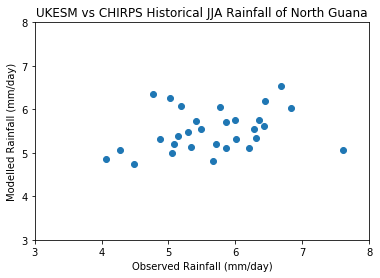

In [17]:
# Plot UKESM vs CHIRPS data
qplt.scatter (N_Guana_CHIRPS[0], N_Guana_jja[22]*86400)
plt.ylabel ('Modelled Rainfall (mm/day)')
plt.xlabel ('Observed Rainfall (mm/day)')
plt.title('UKESM vs CHIRPS Historical JJA Rainfall of North Guana')
plt.xlim (3, 8)
plt.ylim (3, 8)

slope = sm.OLS (N_Guana_jja[22].data*86400, N_Guana_CHIRPS[0].data).fit()

print (slope.summary())

Model magic numbers: 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 18, 19, 21, 22
(Sorry that data is missing for CAMS-CSM1-0)

In [159]:
# Plot bar charts for mean and variance

var = np.array ([np.var (N_Guana_jja[0].data*86400), np.var (N_Guana_jja[1].data*86400), 
                np.var (N_Guana_jja[2].data*86400), np.var (N_Guana_jja[3].data*86400),
                np.var (N_Guana_jja[4].data*86400), np.var (N_Guana_jja[5].data*86400),
                np.var (N_Guana_jja[6].data*86400), np.var (N_Guana_jja[7].data*86400),
                np.var (N_Guana_jja[8].data*86400), np.var (N_Guana_jja[10].data*86400),
                np.var (N_Guana_jja[11].data*86400), np.var (N_Guana_jja[14].data*86400),
                np.var (N_Guana_jja[18].data*86400), np.var (N_Guana_jja[19].data*86400),
                np.var (N_Guana_jja[21].data*86400), np.var (N_Guana_jja[22].data*86400),
                np.var (N_Guana_CHIRPS[0].data)])

mean = np.array ([np.mean (N_Guana_jja[0].data*86400), np.mean (N_Guana_jja[1].data*86400), 
                np.mean (N_Guana_jja[2].data*86400), np.mean (N_Guana_jja[3].data*86400),
                np.mean (N_Guana_jja[4].data*86400), np.mean (N_Guana_jja[5].data*86400),
                np.mean (N_Guana_jja[6].data*86400), np.mean (N_Guana_jja[7].data*86400),
                np.mean (N_Guana_jja[8].data*86400), np.mean (N_Guana_jja[10].data*86400),
                np.mean (N_Guana_jja[11].data*86400), np.mean (N_Guana_jja[14].data*86400),
                np.mean (N_Guana_jja[18].data*86400), np.mean (N_Guana_jja[19].data*86400),
                np.mean (N_Guana_jja[21].data*86400), np.mean (N_Guana_jja[22].data*86400),
                np.mean (N_Guana_CHIRPS[0].data)])

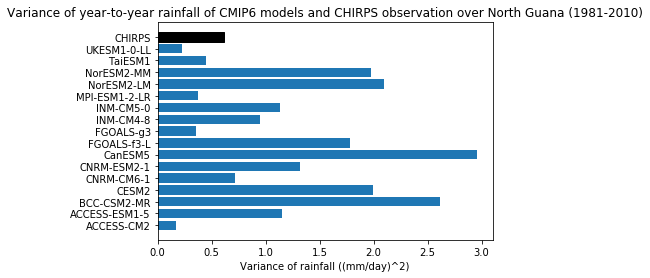

In [154]:
x = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1',
           'CNRM-ESM2-1', 'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 
           'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-LR', 'NorESM2-LM',
           'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL',
           'CHIRPS']

x_pos = [i for i, _ in enumerate(x)]

var_bar = plt.barh (x_pos, var)
var_bar[-1].set_color('black')

plt.title ("Variance of year-to-year rainfall of CMIP6 models and CHIRPS observation over North Guana (1981-2010)")
plt.yticks(x_pos, x)
plt.xlabel("Variance of rainfall ((mm/day)^2)")

plt.show()

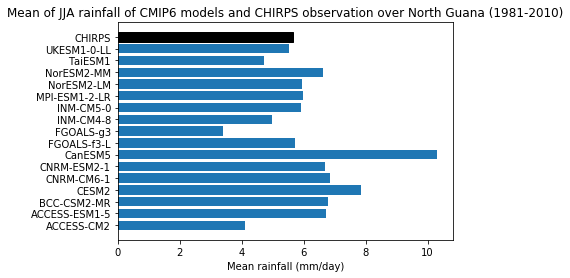

In [155]:
x = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1',
           'CNRM-ESM2-1', 'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 
           'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-LR', 'NorESM2-LM',
           'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL',
           'CHIRPS']

x_pos = [i for i, _ in enumerate(x)]

mean_bar = plt.barh (x_pos, mean)
mean_bar[-1].set_color('black')

plt.title ("Mean of JJA rainfall of CMIP6 models and CHIRPS observation over North Guana (1981-2010)")
plt.yticks(x_pos, x)
plt.xlabel("Mean rainfall (mm/day)")

plt.show()

In [7]:
# Repeat the same steps for South Guana
S_Guana_jja = iris.load(DATA_PATH_2 + 'S_Guana_*.nc')

print (S_Guana_jja)

0: precipitation_flux / (kg m-2 s-1)   (time: 30)
1: precipitation_flux / (kg m-2 s-1)   (time: 30)
2: precipitation_flux / (kg m-2 s-1)   (time: 30)
3: precipitation_flux / (kg m-2 s-1)   (time: 30)
4: precipitation_flux / (kg m-2 s-1)   (time: 30)
5: precipitation_flux / (kg m-2 s-1)   (time: 30)
6: precipitation_flux / (kg m-2 s-1)   (time: 30)
7: precipitation_flux / (kg m-2 s-1)   (time: 30)
8: precipitation_flux / (kg m-2 s-1)   (time: 30)
9: precipitation_flux / (kg m-2 s-1)   (time: 30)
10: precipitation_flux / (kg m-2 s-1)   (time: 30)
11: precipitation_flux / (kg m-2 s-1)   (time: 30)
12: precipitation_flux / (kg m-2 s-1)   (time: 30)
13: precipitation_flux / (kg m-2 s-1)   (time: 30)
14: precipitation_flux / (kg m-2 s-1)   (time: 30)
15: precipitation_flux / (kg m-2 s-1)   (time: 30)
16: precipitation_flux / (kg m-2 s-1)   (time: 30)
17: precipitation_flux / (kg m-2 s-1)   (time: 30)
18: precipitation_flux / (kg m-2 s-1)   (time: 30)
19: precipitation_flux / (kg m-2 s-1)   (

Text(0, 0.5, 'Rainfall (mm/day)')

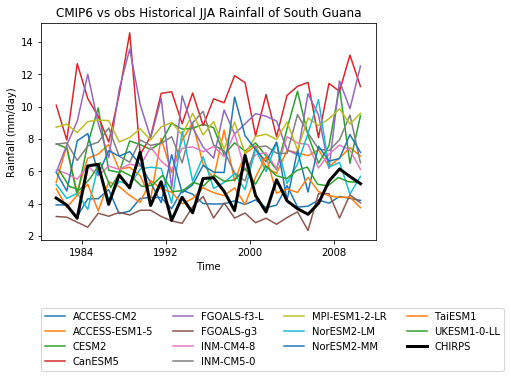

In [94]:
qplt.plot (S_Guana_jja[0]*86400) # ACCESS-CM2
qplt.plot (S_Guana_jja[1]*86400) # ACCESS-ESM1-5
#qplt.plot (S_Guana_jja[2]*86400) # BCC-ESM-1
qplt.plot (S_Guana_jja[3]*86400) # CESM2
#qplt.plot (S_Guana_jja[4]*86400) # CNRM-CM6-1 # Problematic
#qplt.plot (S_Guana_jja[5]*86400) # CNRM-ESM2-1 # Problematic
qplt.plot (S_Guana_jja[6]*86400) # CanESM5
qplt.plot (S_Guana_jja[7]*86400) # FGOALS-f3-L
qplt.plot (S_Guana_jja[8]*86400) # FGOALS-g3
#qplt.plot (S_Guana_jja[9]*86400) # HadGEM3-GC31-MM
qplt.plot (S_Guana_jja[10]*86400) # INM-CM4-8
qplt.plot (S_Guana_jja[11]*86400) # INM-CM5-0
#qplt.plot (S_Guana_jja[12]*86400) # IPSL-CM6A-LR # Problematic
qplt.plot (S_Guana_jja[13]*86400) # MPI-ESM1-2-LR
#qplt.plot (S_Guana_jja[14]*86400) # MPI-ESM-1-2-HAM
#qplt.plot (S_Guana_jja[15]*86400) # MRI-ESM2-0
#qplt.plot (S_Guana_jja[16]*86400) # NESM3 # Problematic
#qplt.plot (S_Guana_jja[17]*86400) # NorCPM1
qplt.plot (S_Guana_jja[18]*86400) # NorESM2-LM
qplt.plot (S_Guana_jja[19]*86400) # NorESM2-MM
#qplt.plot (S_Guana_jja[20]*86400) # SAM0-UNICON
qplt.plot (S_Guana_jja[21]*86400) # TaiESM1
qplt.plot (S_Guana_jja[22]*86400) # UKESM1-0-LL

qplt.plot (S_Guana_CHIRPS[0], color='k', lw=3)

# All models
#plt.legend(['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-ESM-1', 'CESM2', 'CNRM-CM6-1',
#           'CNRM-ESM2-1', 'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 'HadGEM3-GC31-MM',
#           'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MPI-ESM1-2-LR',
#           'MPI-ESM-1-2-HAM', 'MRI-ESM2-0', 'NESM3', 'NorCPM1', 'NorESM2-LM',
#           'NorESM2-MM', 'SAM0-UNICON', 'TaiESM1', 'UKESM1-0-LL'
#           'CHIRPS'], 
#           loc=(0, -0.6), ncol=4)

# Non-problematic models
#plt.legend(['ACCESS-CM2','ACCESS-ESM1-5', 'BCC-ESM-1', 'CanESM5', 'CNRM-ESM2-1', 'FGOALS-f3-L', 
#           'FGOALS-g3', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0', 'MPI_ESM1-2-LR', 'MPI-ESM-1-2-HAM',
#           'MRI-ESM2-0', 'NorCPM1', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON', 'TaiESM1', 'UKESM1-0-LL',
#           'CHIRPS'],
#          loc=(0, -0.6), ncol=4)

# All models used for simulation
# plt.legend(['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1',
#           'CNRM-ESM2-1', 'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 
#           'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-LR', 'NorESM2-LM',
#           'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL',
#           'CHIRPS'], 
#           loc=(0, -0.6), ncol=4)

# Non-problematic models used for simulation
plt.legend(['ACCESS-CM2', 'ACCESS-ESM1-5', 'CESM2', 
            'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 
           'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-LR', 'NorESM2-LM',
           'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL',
           'CHIRPS'], 
           loc=(0, -0.6), ncol=4)
plt.title('CMIP6 vs obs Historical JJA Rainfall of South Guana')
plt.ylabel ('Rainfall (mm/day)')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     524.6
Date:                Tue, 25 May 2021   Prob (F-statistic):           4.04e-20
Time:                        22:47:44   Log-Likelihood:                -49.642
No. Observations:                  30   AIC:                             101.3
Df Residuals:                      29   BIC:                             102.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0927      0.048     22.903      0.0

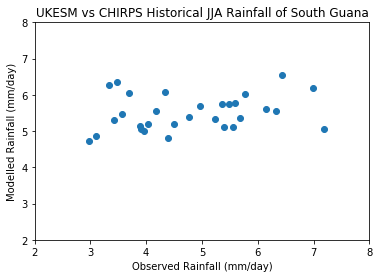

In [21]:
qplt.scatter (S_Guana_CHIRPS[0], S_Guana_jja[22]*86400)
plt.ylabel ('Modelled Rainfall (mm/day)')
plt.xlabel ('Observed Rainfall (mm/day)')
plt.title('UKESM vs CHIRPS Historical JJA Rainfall of South Guana')
plt.xlim (2, 8)
plt.ylim (2, 8)

slope = sm.OLS (S_Guana_jja[22].data*86400, S_Guana_CHIRPS[0].data).fit()

print (slope.summary())

Model magic numbers: 0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 13, 18, 19, 21, 22 (Sorry that data is missing for BCC-CSM2-MR and CAMS-CSM1-0)

In [156]:
var = np.array ([np.var (S_Guana_jja[0].data*86400), np.var (S_Guana_jja[1].data*86400), 
                np.var (S_Guana_jja[3].data*86400), np.var (S_Guana_jja[4].data*86400), 
                np.var (S_Guana_jja[5].data*86400), np.var (S_Guana_jja[6].data*86400), 
                np.var (S_Guana_jja[7].data*86400), np.var (S_Guana_jja[8].data*86400), 
                np.var (S_Guana_jja[10].data*86400), np.var (S_Guana_jja[11].data*86400), 
                np.var (S_Guana_jja[13].data*86400), np.var (S_Guana_jja[18].data*86400), 
                np.var (S_Guana_jja[19].data*86400), np.var (S_Guana_jja[21].data*86400), 
                np.var (S_Guana_jja[22].data*86400), np.var (S_Guana_CHIRPS[0].data)])

mean = np.array ([np.mean (S_Guana_jja[0].data*86400), np.mean (S_Guana_jja[1].data*86400), 
                np.mean (S_Guana_jja[3].data*86400), np.mean (S_Guana_jja[4].data*86400), 
                np.mean (S_Guana_jja[5].data*86400), np.mean (S_Guana_jja[6].data*86400), 
                np.mean (S_Guana_jja[7].data*86400), np.mean (S_Guana_jja[8].data*86400), 
                np.mean (S_Guana_jja[10].data*86400), np.mean (S_Guana_jja[11].data*86400), 
                np.mean (S_Guana_jja[13].data*86400), np.mean (S_Guana_jja[18].data*86400), 
                np.mean (S_Guana_jja[19].data*86400), np.mean (S_Guana_jja[21].data*86400), 
                np.mean (S_Guana_jja[22].data*86400), np.mean (S_Guana_CHIRPS[0].data)])

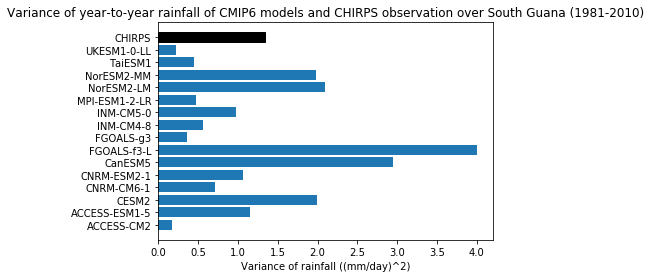

In [157]:
x = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'CESM2', 'CNRM-CM6-1',
           'CNRM-ESM2-1', 'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 
           'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-LR', 'NorESM2-LM',
           'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL',
           'CHIRPS']

x_pos = [i for i, _ in enumerate(x)]

var_bar = plt.barh (x_pos, var)
var_bar[-1].set_color('black')

plt.title ("Variance of year-to-year rainfall of CMIP6 models and CHIRPS observation over South Guana (1981-2010)")
plt.yticks(x_pos, x)
plt.xlabel("Variance of rainfall ((mm/day)^2)")

plt.show()

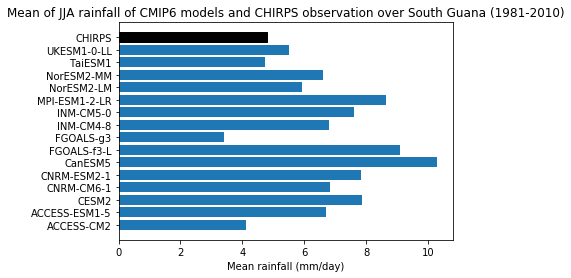

In [158]:
x = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'CESM2', 'CNRM-CM6-1',
           'CNRM-ESM2-1', 'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 
           'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-LR', 'NorESM2-LM',
           'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL',
           'CHIRPS']

x_pos = [i for i, _ in enumerate(x)]

mean_bar = plt.barh (x_pos, mean)
mean_bar[-1].set_color('black')

plt.title ("Mean of JJA rainfall of CMIP6 models and CHIRPS observation over South Guana (1981-2010)")
plt.yticks(x_pos, x)
plt.xlabel("Mean rainfall (mm/day)")

plt.show()